In [1]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Files
df = pd.read_csv('tweet_emotions5.csv')
df.head()

,tweet_id,sentiment,content
0,0,neutral,Why ?
1,1,joy,Sage Act upgrade on my to do list for tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,3,joy,Such an eye ! The true hazel eye-and so brill...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
#File Info
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   34792 non-null  int64 
 1   sentiment  34792 non-null  object
 2   content    34792 non-null  object
dtypes: int64(1), object(2)
memory usage: 815.6+ KB
None


,tweet_id
count,34792.000000
mean,17395.500000
std,10043.729619
min,0.000000
25%,8697.750000
50%,17395.500000
75%,26093.250000
max,34791.000000


In [4]:
#Feature Selection and Renaming
df['emotion']=df['sentiment']
df.drop(columns=['tweet_id','sentiment'],inplace=True)
df.head()

,content,emotion
0,Why ?,neutral
1,Sage Act upgrade on my to do list for tommorow.,joy
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,sadness
3,Such an eye ! The true hazel eye-and so brill...,joy
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,joy


In [5]:
#Checking Null Values
df.isnull().sum()

content    0
emotion    0
dtype: int64

In [6]:
#Text Cleaning
import neattext.functions as nfx
df['content']=df['content'].apply(nfx.remove_stopwords)    # Remove Stopwords
df['content']=df['content'].apply(nfx.remove_userhandles)    # Remove Userhandles
df['content']=df['content'].apply(nfx.remove_punctuations)    # Remove Punctuations
df['content']=df['content'].apply(nfx.remove_emojis)   # Remove emmojis 
df['content']=df['content'].apply(nfx.remove_special_characters)  # Remove special characters
df.head()

,content,emotion
0,,neutral
1,Sage Act upgrade list tommorow,joy
2,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,sadness
3,eye true hazel eyeand brilliant Regular feat...,joy
4,ugh babe hugggzzz u babe naamazed nga ako e...,joy


<Axes: xlabel='emotion', ylabel='count'>

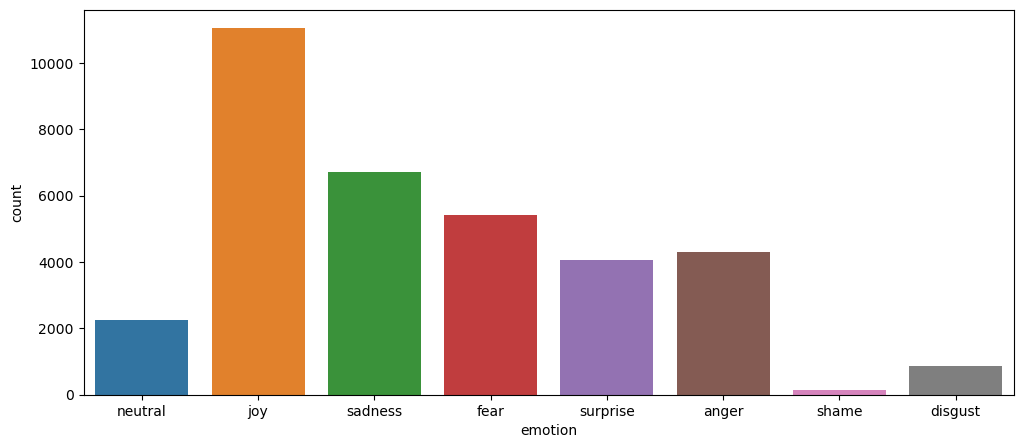

In [7]:
#Visualising all emotions
plt.figure(figsize=(12,5))
sns.countplot(x='emotion',data=df)

In [8]:
#Sentiment Analysis Function
from textblob import TextBlob
def sentiment_analysis(obj):
    text=TextBlob(obj)
    sentiment=text.sentiment.polarity
    if sentiment>0:
        return "Positive"
    elif sentiment<0:
        return "Negative"
    else:
        return "Neutral"


In [9]:
#Sentiment Analysis
df['sentiment']=df['content'].apply(sentiment_analysis)
df.head()

,content,emotion,sentiment
0,,neutral,Neutral
1,Sage Act upgrade list tommorow,joy,Neutral
2,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,sadness,Negative
3,eye true hazel eyeand brilliant Regular feat...,joy,Positive
4,ugh babe hugggzzz u babe naamazed nga ako e...,joy,Neutral


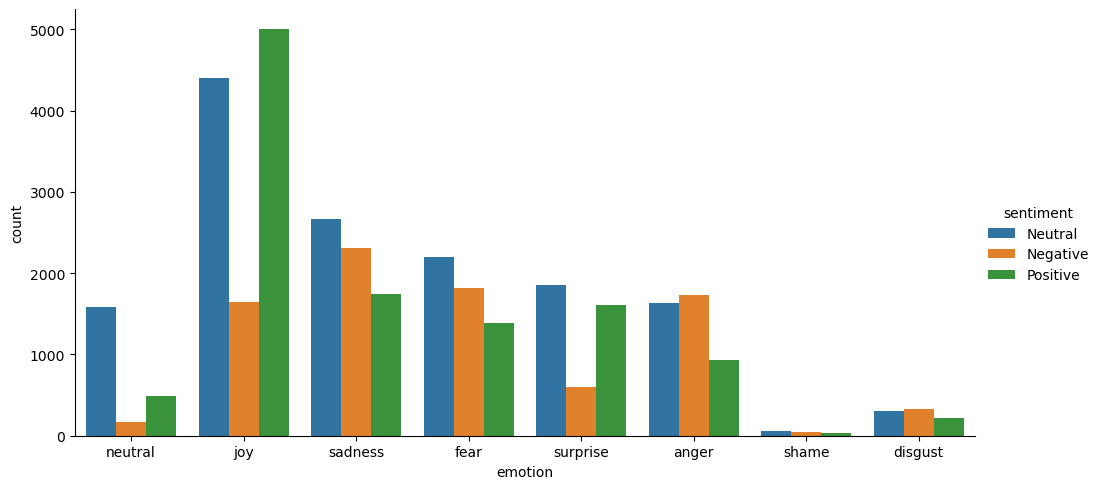

In [10]:
#Visualising emotions and sentiments
sns.catplot(x='emotion',hue='sentiment',data=df,kind='count',aspect=2)

In [11]:
#Keyword Extraction Function
from collections import Counter
def keyword_extract(obj,count=100):
    tokens=[token for token in obj.split()]
    common_t=Counter(tokens).most_common(count)
    return dict(common_t)

In [12]:
#ALl Emotion List
list=df["emotion"].unique().tolist()
list


['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [13]:
#fear Emotion List
fear=df[df["emotion"]=='fear']["content"].tolist()
fear_doc=' '.join(fear)
fear_doc

'Im expecting extremely important phonecall minute terror opportunity assault laughter stand  Mark Twain emotionalcourage primitive Instinct thats friendIt warns pay attention ur dangerit tells act save riding friend car speed 120 kmh snowcovered motorway liked out friend misunderstood know heartoflife good      xAxAAdd things symptom called NERVOSO xAxAu wanna learn  bank secret dismay Virgin s venture airlines  years ago father ill stayed hospital long time experienced terrible feeling lose him quotThe family bedrock society protect institution marriage country fallquot dismay way kids savaging flora Stonethwaite good example    shakiest 14point lead history college football lol People trapped elevator actually stairs time let wear  quote life heard father found letter boyfriend calling talk it results seeing walk situation wo LORD FAITH realizing gets b4 do shot horrified look  applicable myself years ago saw film TV makes afraid Seeing stray dog run right pass Morehouse campus 12 y

In [14]:
#Extract Keywords
fear_keyword=keyword_extract(fear_doc)
fear_keyword

{'afraid': 570,
 'love': 452,
 'today': 404,
 'fear': 404,
 'tomorrow': 401,
 'seen': 364,
 'yesterday': 352,
 'time': 259,
 'less': 257,
 'Im': 246,
 'night': 239,
 'me': 230,
 'scared': 184,
 'like': 174,
 'amp': 174,
 'know': 172,
 'home': 159,
 'people': 154,
 'day': 143,
 's': 142,
 'going': 138,
 'life': 137,
 'frightened': 131,
 'felt': 129,
 'horror': 126,
 'car': 125,
 'way': 121,
 'think': 113,
 'it': 112,
 'de': 111,
 'u': 107,
 'face': 106,
 'nervous': 105,
 'quot': 103,
 '2': 103,
 'dismay': 102,
 'got': 102,
 'feel': 101,
 'saw': 95,
 'house': 95,
 'man': 93,
 'RT': 93,
 'God': 90,
 'anxious': 89,
 'lessquot': 87,
 'friend': 85,
 'dark': 85,
 'let': 84,
 'look': 83,
 'concerned': 83,
 'live': 78,
 'school': 78,
 'years': 77,
 'thing': 77,
 'disquiet': 76,
 'away': 76,
 'want': 76,
 'went': 76,
 'come': 76,
 'thought': 75,
 'things': 74,
 'good': 73,
 'la': 73,
 'came': 73,
 'you': 71,
 'getting': 70,
 'que': 66,
 'horrified': 64,
 'told': 64,
 'cant': 64,
 'little': 63,
 

In [15]:
#Visualisation of Most common keywords function
def plot_commonwords(dict):
    df1=pd.DataFrame(dict.items(),columns=['tokens','count'])
    plt.figure(figsize=(30,10))
    sns.barplot(x='tokens',y='count',data=df1)
    plt.xticks(rotation=45)
    plt.show()


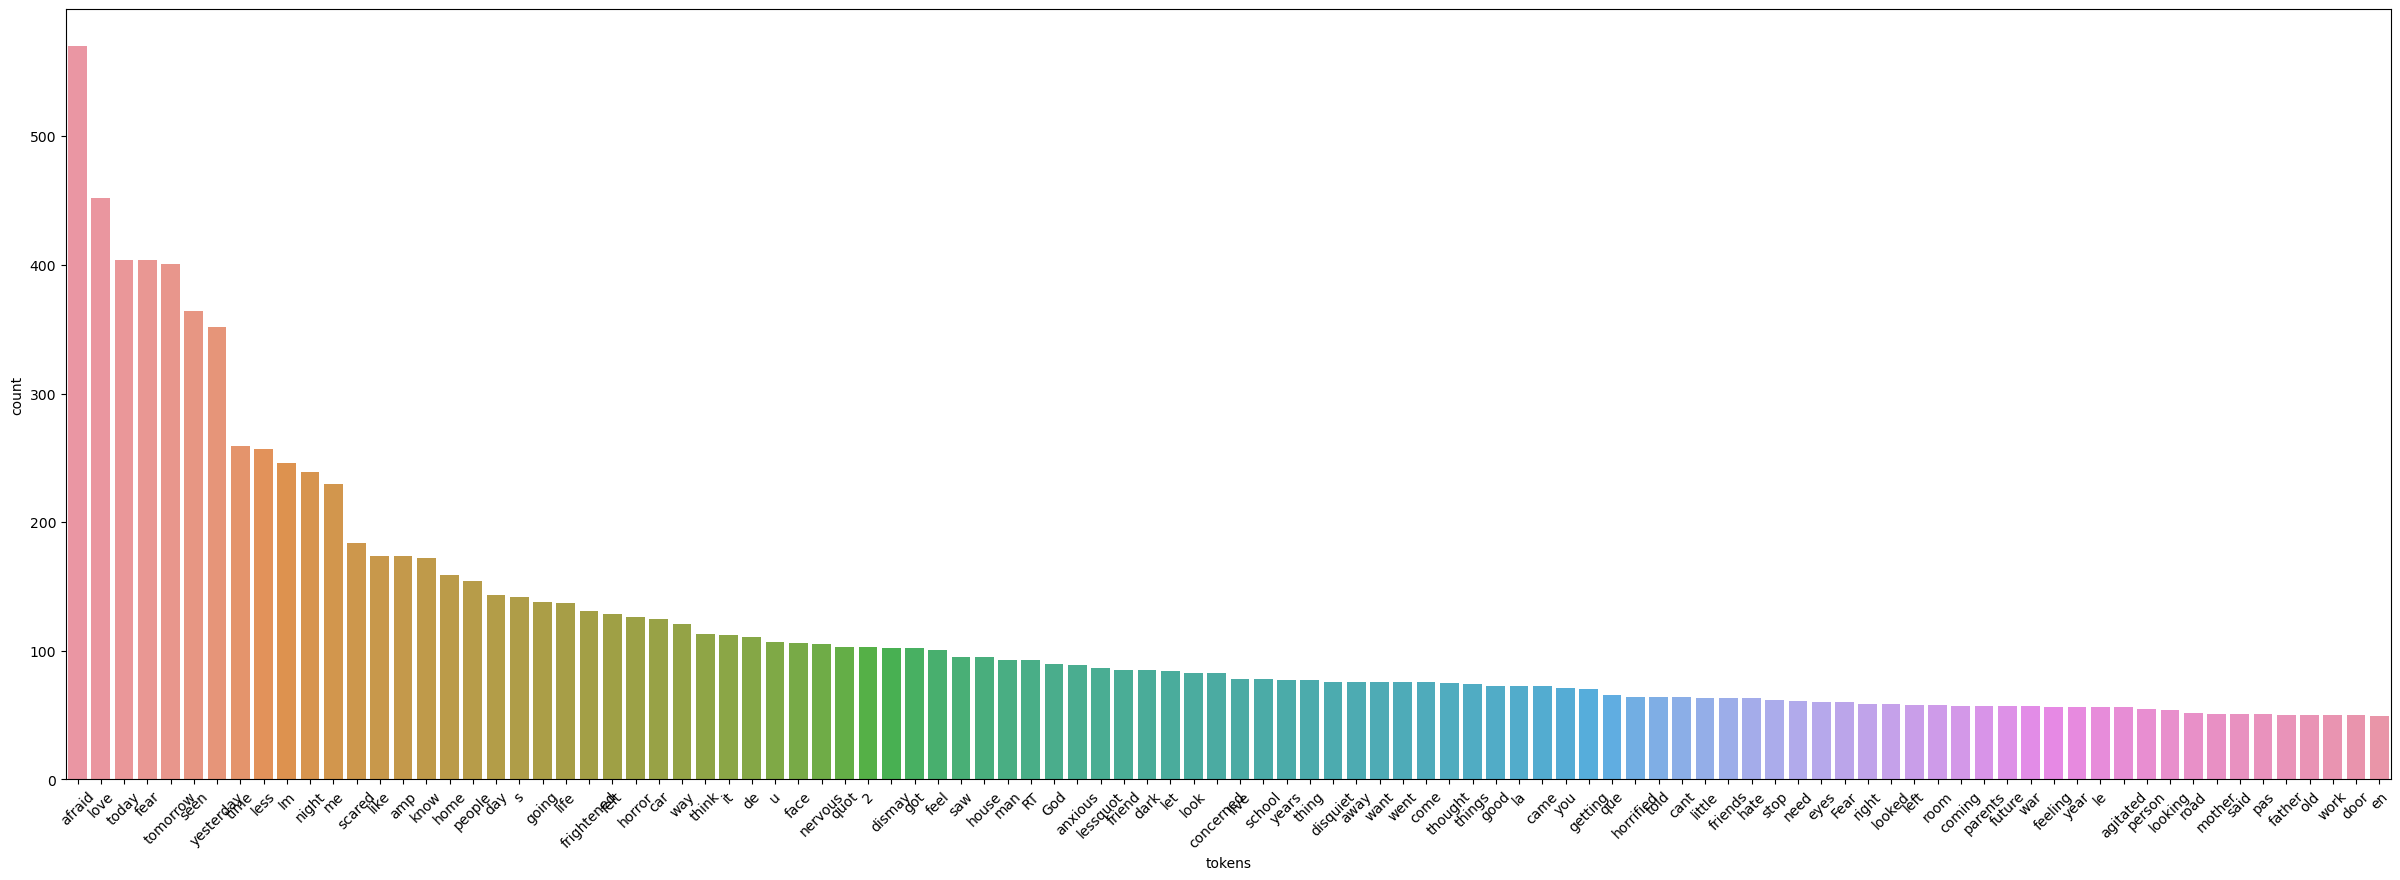

In [16]:
#Visualisation of Most common keywords
plot_commonwords(fear_keyword)

In [17]:
#Word Cloud Function
from wordcloud import WordCloud
def plot_wordcloud(doc):
    mywordcloud=WordCloud().generate(doc)
    plt.figure(figsize=(10,7))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()


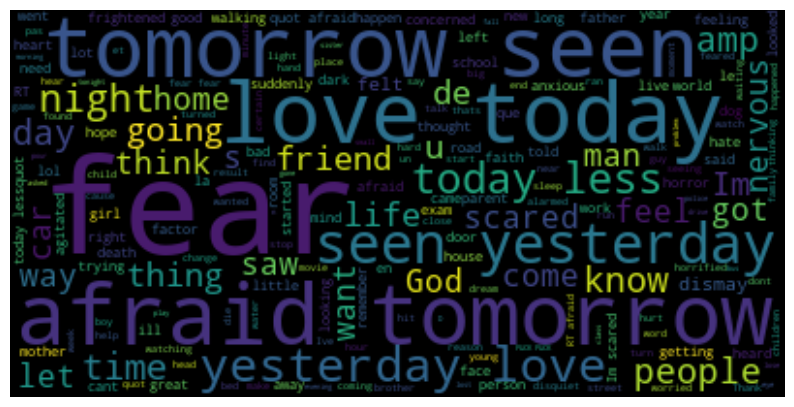

In [18]:
#Word Cloud
plot_wordcloud(fear_doc)

In [19]:
#Import ML libraries
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


In [20]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['N_label'] = label_encoder.fit_transform(df['emotion'])

In [21]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))#example: the course was long-> [the,the course,the course was,course, course was, course was long,...]
data_cv = cv.fit_transform(df['content']).toarray()
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
#X_train, X_test, y_train, y_test=data_cv,test_cv,train['N_label'],test['N_label']
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(data_cv, df['N_label'], test_size=0.25, random_state=42)

In [23]:
# Artificial neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(8, activation='softmax'))
# compile the keras model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model1.fit(X_train, y_train, epochs=10, batch_size=10)
# evaluate the keras model
loss, accuracy = model1.evaluate(X_train, y_train)

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4144 - loss: 1.6187
Epoch 2/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6642 - loss: 1.0013
Epoch 3/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7241 - loss: 0.8205
Epoch 4/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7494 - loss: 0.7395
Epoch 5/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7833 - loss: 0.6454
Epoch 6/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7976 - loss: 0.6071
Epoch 7/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8142 - loss: 0.5529
Epoch 8/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8371 - loss: 0.4904
Epoch 9/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8543 - loss: 0.4471
Epoch 10/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8655 - loss: 0.4173
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8927 - loss: 0.3553


272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 89.43


<Axes: >

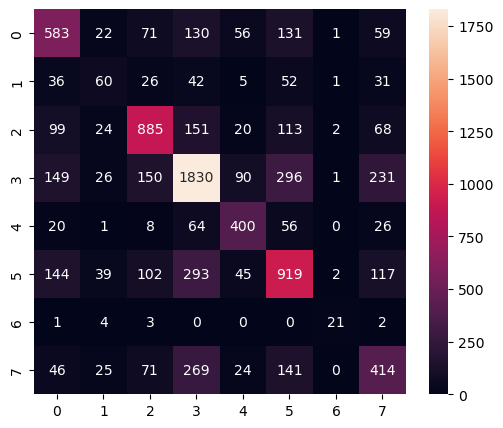

In [24]:
#Accuracy and Confusion Matrix
from sklearn.metrics import confusion_matrix
ypred_prob = model1.predict(X_test)
ypred = np.argmax(ypred_prob, axis=1)

print('Accuracy: %.2f' % (accuracy*100))

cm = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(cm, index = range(8), columns=range(8))
plt.figure(figsize = (6,5))
sns.heatmap(df_cm, annot=True, fmt='g')


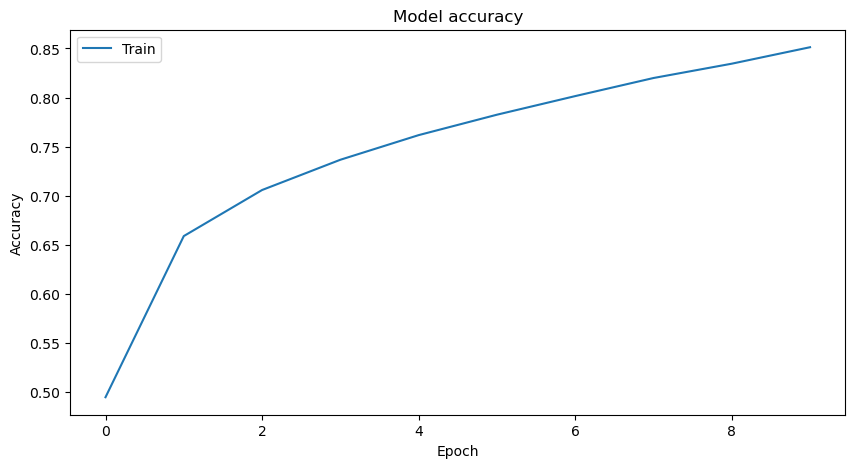

In [25]:
#Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [26]:
text='Arny saw a ghost in his backyard.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'fear'

In [27]:
text='His System was hacked.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


'joy'

In [28]:
text='Priti loves to eat horses at night.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


'anger'

In [29]:
text='He was diagnosed of cancer.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


'fear'

In [30]:
text='Elisha is continuously staring at me and I am confused if I should talk to her or not.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'fear'

In [31]:
text='Manish Pandey scored a century but lost the match.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'sadness'

In [32]:
text='I feeling like rocking at the party.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'joy'

In [33]:
text='The boy next door was staring me in lift.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'fear'

In [34]:
text='Adipurush is such a bitch, so I spit on the movie team'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'disgust'

In [35]:
text='I am going to propose her.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'sadness'

In [36]:
text='Ben own 5 pigs and one of them fucked his wife.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'fear'

In [37]:
text='I hate you.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'joy'

In [38]:
text='My day is going bad.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'sadness'

In [39]:
text="I don't love you."
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'surprise'

In [40]:
text='I am done with you.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'joy'

In [41]:
text='I feel alone.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'sadness'

In [42]:
text='Today we are going to party.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'surprise'

In [43]:
text='I dont want to go to work. I dont like studying . I just feel sleeping. I dont know what to do.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'sadness'

In [44]:
text='I want to go home.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'sadness'

In [45]:
text='I want to murder the prime minister.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'anger'

In [46]:
text='I love you.'
array = cv.transform([text]).toarray()
pred = model1.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'surprise'